In [35]:
from pyspark import SparkContext, SparkConf
from operator import add
import warnings
warnings.filterwarnings("ignore")

In [4]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [10]:
pt =sc.textFile('/ca2/ProjectTweets.csv')

In [6]:
print('number of lines: %s' % file_in.count())

number of lines: 1600000


In [11]:
from pyspark.sql.types import *
path = "/ca2/ProjectTweets.csv"
schema = StructType([StructField('target', IntegerType(), True),
                     StructField('ids', IntegerType(), True),
                     StructField('date', StringType(), True),
                     StructField('flag', StringType(), True),
                     StructField('user', StringType(), True),
                     StructField('text', StringType(), True)])
TweetsDF = spark.read.csv(path,schema)

In [12]:
TweetsDF.printSchema()

root
 |-- target: integer (nullable = true)
 |-- ids: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- user: string (nullable = true)
 |-- text: string (nullable = true)



In [18]:
TweetsDF.head(5)

[Row(target=0, ids=1467810369, date='Mon Apr 06 22:19:45 PDT 2009', flag='NO_QUERY', user='_TheSpecialOne_', text="@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"),
 Row(target=1, ids=1467810672, date='Mon Apr 06 22:19:49 PDT 2009', flag='NO_QUERY', user='scotthamilton', text="is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"),
 Row(target=2, ids=1467810917, date='Mon Apr 06 22:19:53 PDT 2009', flag='NO_QUERY', user='mattycus', text='@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'),
 Row(target=3, ids=1467811184, date='Mon Apr 06 22:19:57 PDT 2009', flag='NO_QUERY', user='ElleCTF', text='my whole body feels itchy and like its on fire '),
 Row(target=4, ids=1467811193, date='Mon Apr 06 22:19:57 PDT 2009', flag='NO_QUERY', user='Karoli', text="@nationwideclass no, it's not behaving at all. i'm mad. why am i here? be

In [19]:
TweetsDF.dtypes

[('target', 'int'),
 ('ids', 'int'),
 ('date', 'string'),
 ('flag', 'string'),
 ('user', 'string'),
 ('text', 'string')]

In [28]:
from pyspark.sql import functions as F

# Read raw csv file into SparkDataFrame
sdf_raw = spark.read.options(header=False,delimiter=',').schema(schema).csv(path).repartition(16).cache()
sdf_raw.show()

+------+----------+--------------------+--------+---------------+--------------------+
|target|       ids|                date|    flag|           user|                text|
+------+----------+--------------------+--------+---------------+--------------------+
|  3778|1468674287|Tue Apr 07 03:05:...|NO_QUERY|      spwhitton|Just booted into ...|
| 46315|1677375587|Sat May 02 01:45:...|NO_QUERY|  Dancingkate16|I hate revising w...|
|660821|      null|Fri Jun 19 12:42:...|NO_QUERY|   MzVannaBlack|@introversive i w...|
|623046|      null|Thu Jun 18 15:42:...|NO_QUERY|       arlenexo|it's JUNE - almos...|
|108478|1824293567|Sun May 17 00:46:...|NO_QUERY|     lavishlace|Still wOrk , fuck...|
|181009|1966735305|Fri May 29 18:18:...|NO_QUERY|     Rachael102|is gonna stop upl...|
| 94860|1771212334|Mon May 11 23:34:...|NO_QUERY|  alexandragood|pizookies AND dan...|
|627407|      null|Thu Jun 18 17:47:...|NO_QUERY|       shiney42|@PhillyNYY See Ya...|
|755385|      null|Mon Jun 22 19:00:...|NO_

2023-11-12 01:09:34,341 WARN execution.CacheManager: Asked to cache already cached data.


In [51]:
tweetsdf= sdf_raw.toPandas()

In [52]:
tweetsdf

,target,ids,date,flag,user,text
0,3778,1.468674e+09,Tue Apr 07 03:05:35 PDT 2009,NO_QUERY,spwhitton,Just booted into Windows to upload something s...
1,46315,1.677376e+09,Sat May 02 01:45:22 PDT 2009,NO_QUERY,Dancingkate16,I hate revising when the sun comes out and I'm...
2,660821,NaN,Fri Jun 19 12:42:04 PDT 2009,NO_QUERY,MzVannaBlack,@introversive i was just saying that the other...
3,623046,NaN,Thu Jun 18 15:42:31 PDT 2009,NO_QUERY,arlenexo,it's JUNE - almost JULY. getting sick of this ...
4,108478,1.824294e+09,Sun May 17 00:46:43 PDT 2009,NO_QUERY,lavishlace,"Still wOrk , fuck , I'm still at wooorrrkkkk"
...,...,...,...,...,...,...
1599995,1320636,2.014611e+09,Wed Jun 03 02:06:06 PDT 2009,NO_QUERY,kikimako,Everyone else better lift your game. You know ...
1599996,1184189,1.982565e+09,Sun May 31 11:27:46 PDT 2009,NO_QUERY,tortor56,ready for something extraordinary to happen
1599997,1367768,2.050473e+09,Fri Jun 05 18:43:55 PDT 2009,NO_QUERY,ReyBarcena,About 2 do a show honering mr. Nygel lythgoe a...
1599998,989157,1.834843e+09,Mon May 18 04:22:44 PDT 2009,NO_QUERY,seisui,enjoying sunday on monday


In [57]:
tweetsdf['date']=pd.to_datetime(tweetsdf['date'])

In [63]:
tweetsdf.dtypes

target      int32
ids       float64
flag       object
user       object
text       object
dtype: object

2023-11-12 08:22:16,148 WARN spark.HeartbeatReceiver: Removing executor driver with no recent heartbeats: 11091316 ms exceeds timeout 120000 ms
2023-11-12 08:22:16,171 WARN spark.SparkContext: Killing executors is not supported by current scheduler.


In [2]:
import pandas as pd
import datetime

In [59]:
tweetsdf.set_index("date", inplace=True)

In [62]:
tweetsdf

,target,ids,flag,user,text
date,,,,,
2009-04-07 03:05:35,3778,1.468674e+09,NO_QUERY,spwhitton,Just booted into Windows to upload something s...
2009-05-02 01:45:22,46315,1.677376e+09,NO_QUERY,Dancingkate16,I hate revising when the sun comes out and I'm...
2009-06-19 12:42:04,660821,NaN,NO_QUERY,MzVannaBlack,@introversive i was just saying that the other...
2009-06-18 15:42:31,623046,NaN,NO_QUERY,arlenexo,it's JUNE - almost JULY. getting sick of this ...
2009-05-17 00:46:43,108478,1.824294e+09,NO_QUERY,lavishlace,"Still wOrk , fuck , I'm still at wooorrrkkkk"
...,...,...,...,...,...
2009-06-03 02:06:06,1320636,2.014611e+09,NO_QUERY,kikimako,Everyone else better lift your game. You know ...
2009-05-31 11:27:46,1184189,1.982565e+09,NO_QUERY,tortor56,ready for something extraordinary to happen
2009-06-05 18:43:55,1367768,2.050473e+09,NO_QUERY,ReyBarcena,About 2 do a show honering mr. Nygel lythgoe a...


In [64]:
tweets=tweetsdf['text']
tweets.to_csv('tweets_sparksql.csv')

In [2]:
#pip install tensorflow

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jose\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
t=pd.read_csv("tweets_sparksql.csv")
t.head(5)

,date,text
0,2009-04-07 03:05:35,Just booted into Windows to upload something s...
1,2009-05-02 01:45:22,I hate revising when the sun comes out and I'm...
2,2009-06-19 12:42:04,@introversive i was just saying that the other...
3,2009-06-18 15:42:31,it's JUNE - almost JULY. getting sick of this ...
4,2009-05-17 00:46:43,"Still wOrk , fuck , I'm still at wooorrrkkkk"


In [64]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
t=pd.read_csv("tweets_sparksql.csv", usecols=['text'])
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')
def text_prep(x: str) -> list:
     corp = str(x).lower()
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [a for a in tokens if a not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
     return lemmatize
preprocess_tag = [text_prep(i) for i in t['text']]
t["preprocess_txt"] = preprocess_tag
t['total_len'] = t['preprocess_txt'].map(lambda x: len(x))
file = open('negative-words.txt', 'r')
neg_words = file.read().split()
file = open('positive-words.txt', 'r')
pos_words = file.read().split()
num_pos = t['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
t['pos_count'] = num_pos
num_neg = t['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
t['neg_count'] = num_neg
t['sentiment'] = round((t['pos_count'] - t['neg_count']) / t['total_len'], 2)
t.head(3)

,text,preprocess_txt,total_len,pos_count,neg_count,sentiment
0,Just booted into Windows to upload something s...,"[booted, window, upload, something, since, int...",9,0,1,-0.11
1,I hate revising when the sun comes out and I'm...,"[hate, revising, sun, come, stuck, inside]",6,0,2,-0.33
2,@introversive i was just saying that the other...,"[introversive, saying, day, sux]",4,0,0,0.00


In [86]:
t.shape

(1600000, 6)

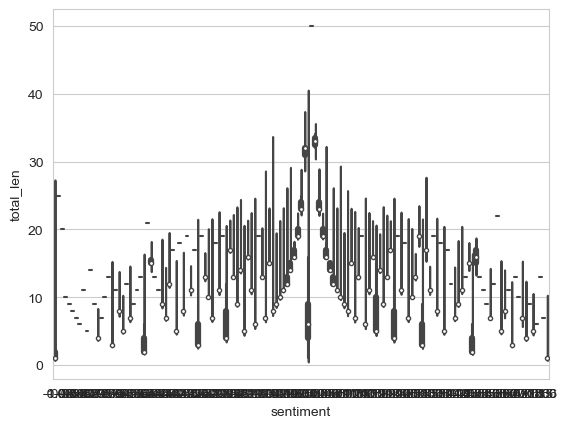

In [70]:
import seaborn as sns
ax = sns.violinplot(x="sentiment", y="total_len", data=t)

In [98]:
#pip install statsmodels

In [92]:
#pip install keras

In [100]:
#pip install pandas-datareader

In [93]:
#pip install np_utils

In [95]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import RNN
from tensorflow.keras.utils import to_categorical

In [101]:
import pandas as pd 
import pandas_datareader as web 
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

#relax the display limits on columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
t['length']= t['text'].str.split().map(lambda x: len(x))
 
df_class0 = t[t['sentiment']==0]
df_class4 = t[t['sentiment']==4]
 
print(f"Overall average text length: {t['length'].mean()}")
print(f"Average text length class 0 (negative): {df_class0['length'].mean()}")
print(f"Average text length class 4 (positive): {df_class4['length'].mean()}")
print(f"Median text length class 0 (negative): {df_class0['length'].median()}")
print(f"Median text length class 4 (positive): {df_class4['length'].median()}")
print(f"Max text length class 0 (negative): {df_class0['length'].max()}")
print(f"Max text length class 4 (positive): {df_class4['length'].max()}")
print(f"Min text length class 0 (negative): {df_class0['length'].min()}")
print(f"Min text length class 4 (positive): {df_class4['length'].min()}")